In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F 

import utils.tavr_torch as tavr_torch
from utils.tavr_torch import TAVR_3_Frame, TAVR_1_Frame, TAVR_Sequence, tavr_dataloader
from utils.visualization import display_grid, z_stretch, visualize_frame, set_figsize, get_central_slices
from utils.loss_functions import batch_l2_loss
from utils.run_model import train, test
from Models.basic_models import average_model, two_layer_basic


set_figsize(20, 15)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
USE_GPU = True
dtype = torch.float32 # we will be using float throughout this tutorial
if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
# Constant to control how frequently we print train loss
print_every = 100
print('using device:', device)

using device: cpu


In [6]:
validation = TAVR_3_Frame("__valid")
val_loader = tavr_dataloader(validation, batch_size=16, shuffle=True, num_workers=2)
training = TAVR_3_Frame("__train")
train_loader = tavr_dataloader(training, batch_size=8, shuffle=True, num_workers=2)

In [7]:
ave_model = average_model()
basic_model = two_layer_basic(standardize_slice=True)
l2_loss = batch_l2_loss()

In [8]:
learning_rate = 1e-4
momentum = 0.95
reg = 1e-7

optimizer = optim.SGD(basic_model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=reg, nesterov=True)

In [9]:
train(basic_model, optimizer, train_loader, val_loader, 
         l2_loss, device, 
         print_every=30)

Time 0
Epoch 0 Iteration 0, loss = 0.2568
Validation loss 0.2689 over 81 frames

Time 1
Time 2
Time 3
Time 4
Time 5
Time 6
Time 7
Time 8
Time 9
Time 10
Time 11
Time 12
Time 13
Time 14
Time 15
Time 16
Time 17
Time 18
Time 19
Time 20
Time 21
Time 22
Time 23
Time 24
Time 25
Time 26
Time 27
Time 28
Time 29
Time 30
Iteration 30, loss = 0.2421
Validation loss 0.2581 over 81 frames

Time 31
Time 32
Time 33
Time 34
Time 35
Time 36
Time 37
Time 38
Time 39
Time 40
Time 41
Time 42
Time 43
Time 44
Time 45
Time 46
Time 47
Time 48
Time 49
Time 50
Time 51
Time 52
Time 53
Time 54
Time 55
Time 56
Time 57
Time 58
Time 59
Time 60
Iteration 60, loss = 0.2280
Validation loss 0.2424 over 81 frames

Time 61
Time 62
Time 63
Time 64
Time 65
Time 66
Time 67
Time 68
Time 69
Time 70
Time 71
Time 72
Time 73
Time 74
Time 75
Time 76
Time 77
Time 78
Time 79
Time 80


In [10]:
val_seq = TAVR_Sequence("__valid")
test(basic_model, val_loader, l2_loss, device)
test(ave_model, val_loader, l2_loss, device)

Validation loss 0.2343 over 81 frames
Validation loss 0.0047 over 81 frames


/home/shared/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


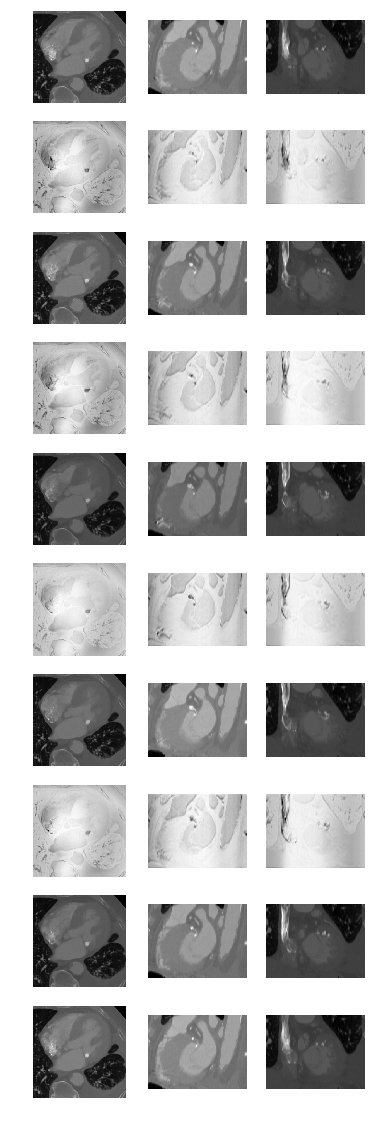

In [11]:
with torch.no_grad():
    basic_model.eval()
    ave_frames = [val_seq[0][0]]
    for i in range(2,9,2):
        ave_frame = basic_model((val_seq[0][i-2][None,:], val_seq[0][i][None,:]))
        ave_frames += [ave_frame[0][0],  val_seq[0][i]]
    ave_frames += [val_seq[0][9]]
    ave_frames_slices = []
    for f in ave_frames:
        ave_frames_slices += get_central_slices(f)
    set_figsize(6,20)
    display_grid(10, 3, ave_frames_slices)